In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load and preprocess the data
def load_and_preprocess_data(file_path):
    # Read the data
    df = pd.read_csv(file_path)

    # Convert categorical variables
    le = LabelEncoder()
    df['month'] = le.fit_transform(df['month'])
    df['day'] = le.fit_transform(df['day'])

    # Apply log transform to area as suggested
    df['log_area'] = np.log1p(df['area'])

    return df

In [7]:
def select_features(df):
    # Select numerical features for clustering
    # Excluding 'area' and including 'log_area'
    features = ['X', 'Y', 'month', 'FFMC', 'DMC', 'DC', 'ISI',
                'temp', 'RH', 'wind', 'rain', 'log_area']

    return df[features]

def find_optimal_clusters(data, max_k=10):
    silhouette_scores = []
    K = range(2, max_k+1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    optimal_k = K[np.argmax(silhouette_scores)]

    # Plot silhouette scores
    plt.figure(figsize=(10, 6))
    plt.plot(K, silhouette_scores, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.show()

    return optimal_k

def perform_clustering(data, n_clusters):
    # Standardize the features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    return clusters, scaled_data

def visualize_clusters(scaled_data, clusters):
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(scaled_data)

    # Create scatter plot
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1],
                         c=clusters, cmap='viridis')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Cluster Visualization using PCA')
    plt.colorbar(scatter, label='Cluster')
    plt.show()

def analyze_clusters(df, clusters):
    # Add cluster labels to the original dataframe
    df_with_clusters = df.copy()
    df_with_clusters['Cluster'] = clusters

    # Calculate mean values for each cluster
    cluster_means = df_with_clusters.groupby('Cluster').mean()

    # Create heatmap of cluster characteristics
    plt.figure(figsize=(15, 8))
    sns.heatmap(cluster_means, annot=True, cmap='YlOrRd', fmt='.2f')
    plt.title('Cluster Characteristics (Mean Values)')
    plt.show()

    return cluster_means



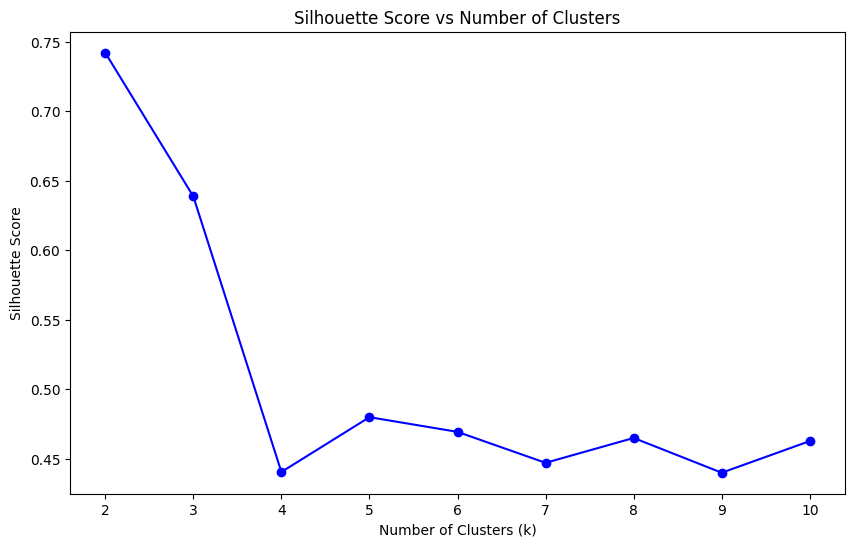

Optimal number of clusters: 2


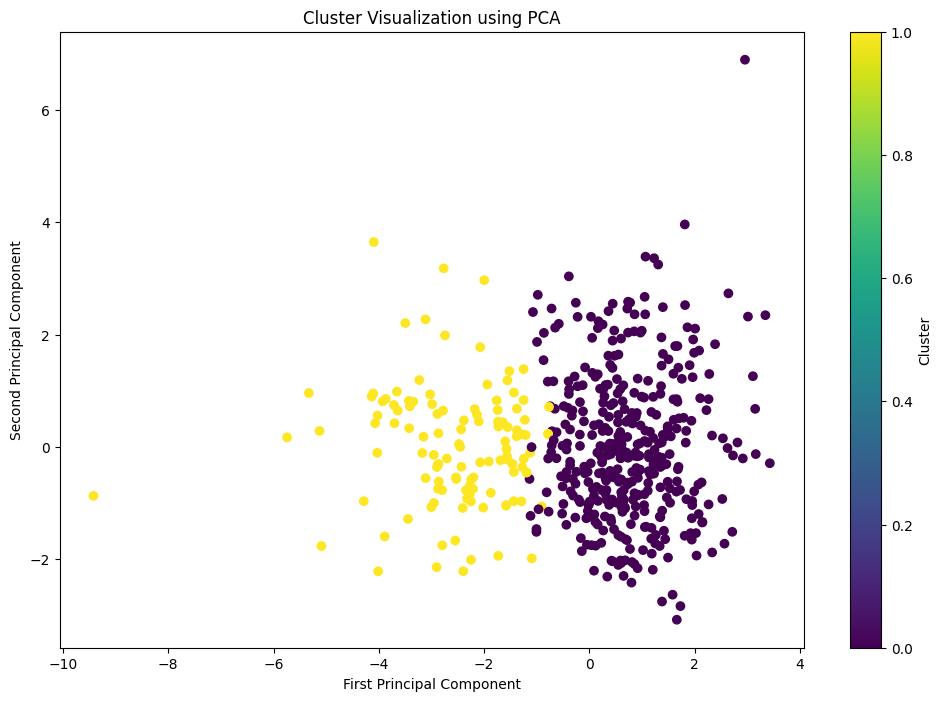

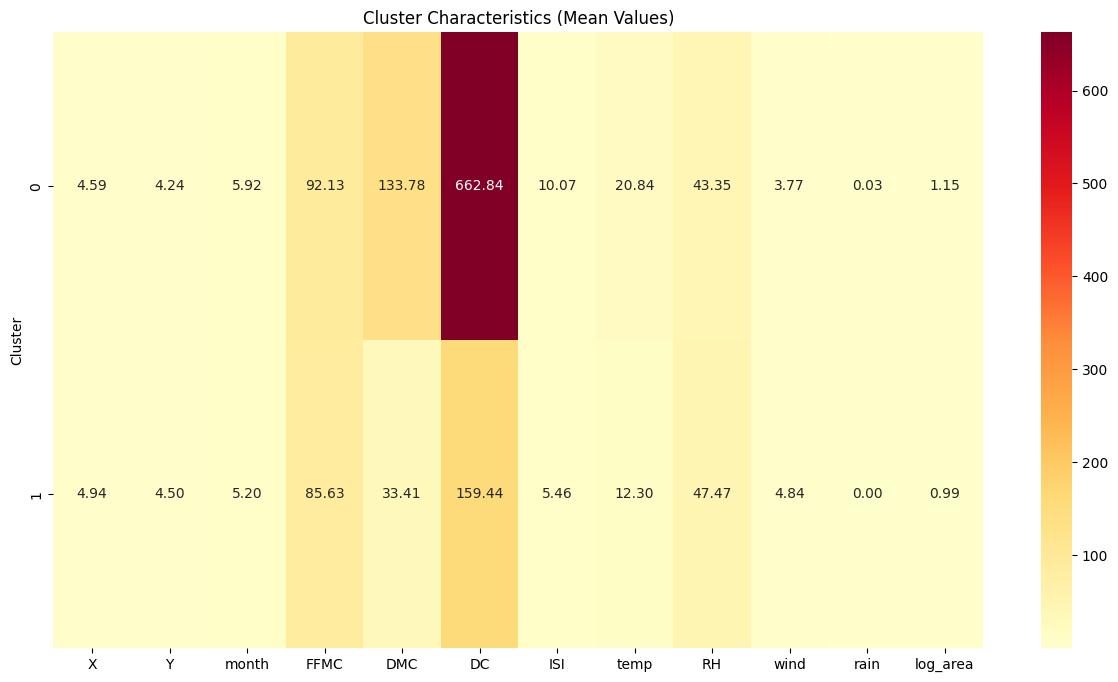

In [8]:
def main():
    # Load and preprocess data
    df = load_and_preprocess_data('/content/forestfires.csv')

    # Select features for clustering
    features_df = select_features(df)

    # Find optimal number of clusters
    optimal_k = find_optimal_clusters(features_df)
    print(f"Optimal number of clusters: {optimal_k}")

    # Perform clustering
    clusters, scaled_data = perform_clustering(features_df, optimal_k)

    # Visualize results
    visualize_clusters(scaled_data, clusters)

    # Analyze cluster characteristics
    cluster_means = analyze_clusters(features_df, clusters)

    return df, clusters, cluster_means

# Run the analysis
if __name__ == "__main__":
    df, clusters, cluster_means = main()